# Data Science Project - Write a blog post 
The project is being done as a part of Udacity Data Science Nanodegree. The objective of the project is to create a sucessful blog post based on data analysis of datasets available on Internet. For my submission, I have used IMDB dataset for movies available on Kaggle and run data analysis to produce insights that answer key questions about movies uploaded at IMDB 

In [1]:
#import relevant libraries for operations
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion 
Ingesting data from Kaggle file. Here we are importing IMDB movies dataset

In [2]:
# Reading our dataset
imdb_df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

Run basic analysis for high level assessment of the data ingested

In [3]:
#looking at top rows of the imdb dataset
imdb_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
imdb_df.info

<bound method DataFrame.info of                                            Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   

In [5]:
#Get the dataset size 
imdb_df.shape #1000 rows and 16 columns

(1000, 16)

In [6]:
#Assess the datatypes of the features imported from Kaggle's IMDB dataset
imdb_df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

Run checks for missing values

In [7]:
#Studying missing values
imdb_df.isnull().any()

Poster_Link      False
Series_Title     False
Released_Year    False
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

In [8]:
#Counting missing values
imdb_df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
#Total number of missing values
imdb_df.isna().sum().sum()

427

## Data Cleansing 
Perform data cleansing operations to remove duplicates, replace missing values with zeros. Presence of incorrect data can affect the overall outcome and results.

In [10]:
#Filling in zero values for nulls 
imdb_df[["Meta_score", "Gross"]] = imdb_df[["Meta_score", "Gross"]].fillna(0)

In [11]:
#Checking for zero values
imdb_df[["Meta_score", "Gross"]]

,Meta_score,Gross
0,80.0,"28,341,469"
1,100.0,"134,966,411"
2,84.0,"534,858,444"
3,90.0,"57,300,000"
4,96.0,"4,360,000"
...,...,...
995,76.0,0
996,84.0,0
997,85.0,"30,500,000"
998,78.0,0


In [12]:
#Checking to see if any duplicates available
imdb_df.dropna()
imdb_df.drop_duplicates() 

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


In [13]:
#Looking at data size to check duplicates
imdb_df.shape
#there are no duplicates

(1000, 16)

In [14]:
#Checking for duplicate title
#Arrange by Series_Title
imdb_df.sort_values("Series_Title", inplace = True)

In [15]:
# Removing rows with the same series title
imdb_df.drop_duplicates(subset ="Series_Title",
                     keep = False, inplace = True)

#Checking if the Series_Title can be used as index
imdb_df.Series_Title.is_unique

True

In [16]:
#Making Series_Title as index
imdb_df.set_index('Series_Title')
imdb_df.shape 
#Difference in dataset size. 998 rows after removing duplicate rows

(998, 16)

## Data Analysis & Visualization 
Running data science techniques to generate insights which can be used to answer questions about IMDB datasets for movies.

#### Question 1 - Finding movies distribution on IMDB based on their genres

In [17]:
# Genre based analysis - Finding total number of movies across genres
imdb_dfQ1 = imdb_df.copy()
imdb_dfQ1
imdb_dfQ1['Genre'] = imdb_dfQ1["Genre"].str.split(',')
imdb_dfQ1a = imdb_dfQ1.explode("Genre")
imdb_dfQ1a
imdb_dfQ1a['Genre'].str.strip().value_counts()

Drama        722
Comedy       233
Crime        207
Adventure    196
Action       189
Thriller     136
Romance      125
Biography    109
Mystery       98
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: Genre, dtype: int64

From plenty of movies uploaded and rated on IMDB, a majority of lot is fiction. Drama seems to be most common choices of movies made. There are 700+ movies on this genre.
You will relatively find similar number of movies across Comedy, Crime , Adventure and Action. Close to 200 movies across each of the genre creates a massive pool of entertainment.

#### Question 2 - Finding Top 3 directors for movies uploaded on IMDB

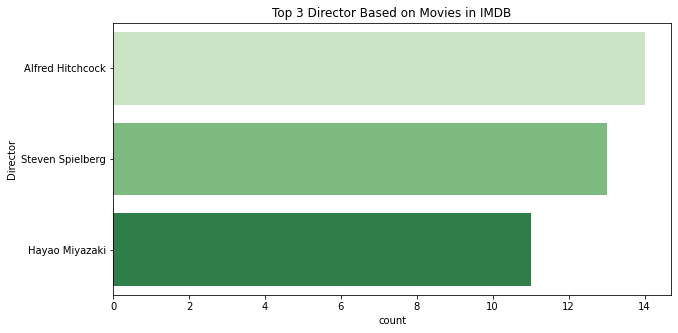

In [18]:
# Top directors
plt.figure(figsize=(10,5))
plt.title('Top 3 Director Based on Movies in IMDB')
sns.countplot(y = imdb_df['Director'] , order=imdb_df['Director'].value_counts().index[:3], palette='Greens')
plt.show()

Alfred Hitchrock enjoys the prestige of the best director and is followed by Steven Spielberg. Hayao Moyazaki comfortably enjoys the 3rd honour.

#### Question 3 - Finding top 3 movies based on IMDB rating and no. of votes

In [19]:
# Top 3 movies based on IMDB ratings and number of votes 
imdb_df3 = imdb_df.sort_values(["IMDB_Rating", "No_of_Votes"], ascending=False).reset_index()
Top3 = imdb_df3['Series_Title'].head(3)
Top3

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
Name: Series_Title, dtype: object

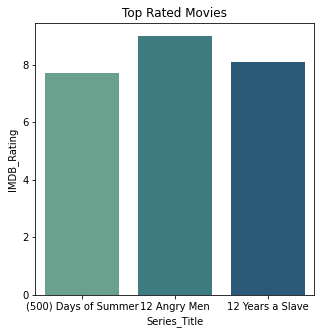

In [20]:
#plotting the top movies based on ratings
fig,axs=plt.subplots(figsize=(5,5))
g=sns.barplot(x=imdb_df['Series_Title'][:3],y=imdb_df['IMDB_Rating'][:3], palette = "crest")
g.set_title("Top Rated Movies")
plt.show()

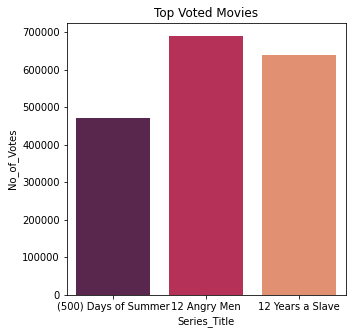

In [21]:
#plotting the top movies based on no of votes
fig,axs=plt.subplots(figsize=(5,5))
g=sns.barplot(x=imdb_df['Series_Title'][:3],y=imdb_df['No_of_Votes'][:3], palette = "rocket")
g.set_title("Top Voted Movies")
plt.show()

The top 3 rated movies on IMDB are
(i) 500 days of summer — taking the first spot
(ii) 12 Angry Men — this is front runner
(iii) 12 years a slave — third spot on the list

#### Question 4 - Finding movies distribution on IMDB for different ratings 

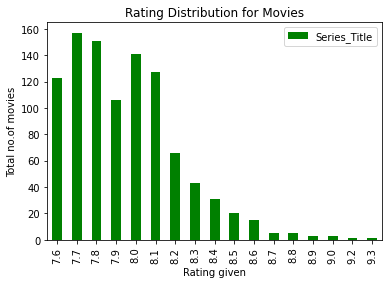

In [22]:
# Looking at total number of movies on IMDB based on their rating type
rating_group = imdb_df[['IMDB_Rating', 'Series_Title']].groupby('IMDB_Rating').count()
# Visualizing the data
rating_group.plot(kind='bar', title='Rating Distribution for Movies', color = "g")
plt.xlabel('Rating given')
plt.ylabel('Total no.of movies')
plt.show()

IMDB is rich with best work. Most of the movies on IMDB are categorically rated on a scale between 7.5 and 8.5. There are >100 movies with given user rating.

#### Question 5 - Running time/length of movie analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


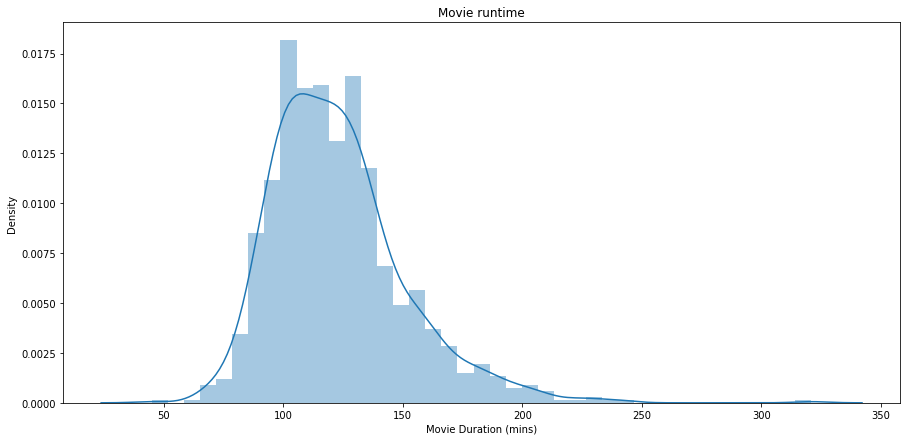

In [23]:
imdb_df['Runtime_num']= imdb_df['Runtime'].str.split(' ', expand = True)[0]
imdb_df.head()
plt.figure(figsize= [15,7])
g = sns.distplot(imdb_df['Runtime_num'])
g.axes.set_title('Movie runtime')
g.set_xlabel('Movie Duration (mins)')
plt.show()

The average time for movies is about 100 mins.

Get requirements - 

In [24]:
!pip freeze

absl-py==0.12.0
adal @ file:///home/conda/feedstock_root/build_artifacts/adal_1611297630154/work
affine==2.3.0
aiobotocore==1.2.2
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1610358547752/work
aiohttp-cors==0.7.0
aioitertools==0.7.1
aioredis==1.3.1
albumentations==0.5.2
alembic==1.5.8
allennlp==2.2.0
altair==4.1.0
annoy==1.17.0
ansiwrap==0.8.4
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1610522577486/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1610483719724/work
arviz==0.11.2
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy @ file:///home/conda/feedstock_root/build_artifacts/astropy_1612734311738/work
astunparse==1.6.3
async-generator==1.10
async-timeout==3.0.1
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1605083924122/work
audioread==2.1.9
autocfg==0